In [1]:
import pandas as pd

from aggme.aggregation import IntervalAggregation
from aggme.utils import AnnotationData, Visualizer
from aggme.utils.processing import abc_intervals_to_template

# Loading data

In [2]:
data = AnnotationData(markup_type='interval')

In [3]:
df = pd.read_csv("./input_files/intervals_data.csv")
df.head(3)

,INPUT:video,OUTPUT:video,ASSIGNMENT:user_id
0,case_000_ov3_cl1,"[{'begin':0.73027,'end':2.17368,'label':'inter...",user_1
1,case_000_ov3_cl1,"[{'begin':0.85214,'end':2.12798,'label':'inter...",user_2
2,case_000_ov3_cl1,"[{'begin':0.75699,'end':2.33033,'label':'inter...",user_3


# Check and visualize the data

In [4]:
data.load_markups(df, abc_intervals_to_template)
group = data.groups[0]
group

MarkupGroup object
name: case_000_ov3_cl1
data_len: 3
annotators_len: 3

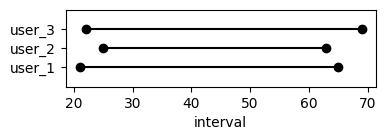

In [5]:
vis_group = Visualizer(group)
vis_group.draw(group)

# Aggregate

In [6]:
aggregator = IntervalAggregation()

Total results of aggregation:
- Every failed step sends markup group to next method in this order `['hard', 'drop', 'soft']`,
- To make drop logic work, you shold have more than 3 markups on image and possibly a lower threshold/confidence value,
- Every markup, that failed all the methods goes to `['fail']`.

In [7]:
data.load_markups(df, abc_intervals_to_template)
results = aggregator.get_aggregation_results(data, threshold=0.7, confidence=0.8)

100%|██████████| 14/14 [00:00<00:00, 61.58it/s]


In [8]:
results.keys()

dict_keys(['hard', 'drop', 'soft', 'fail'])

In [9]:
len(results['hard']), len(results['drop']), len(results['soft']), len(results['fail'])

(5, 4, 2, 3)

In [10]:
results

{'hard': [(MarkupGroup object
   name: case_000_ov3_cl1
   data_len: 3
   annotators_len: 3,
   MarkupGroup object
   name: case_000_ov3_cl1
   data_len: 1
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_000_ov3_cl2
   data_len: 6
   annotators_len: 3,
   MarkupGroup object
   name: case_000_ov3_cl2
   data_len: 2
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_005_ov4_cl1_rm_interval
   data_len: 3
   annotators_len: 3,
   MarkupGroup object
   name: case_005_ov4_cl1_rm_interval
   data_len: 1
   annotators_len: 1,
   {'user_1', 'user_2', 'user_4'},
   set()),
  (MarkupGroup object
   name: case_006_ov3_cl1_other_interval
   data_len: 3
   annotators_len: 3,
   MarkupGroup object
   name: case_006_ov3_cl1_other_interval
   data_len: 1
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_006_ov4_cl1_other_interval
   data_len

# Visualise results

<font color='green'> Green </font> color at the top of image shows that annotators are __correct__. <font color="red">Red</font> color will be showing otherwise.

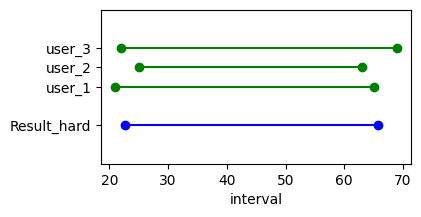

In [11]:
#  Example 0.1
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: GOOD

method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl1')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

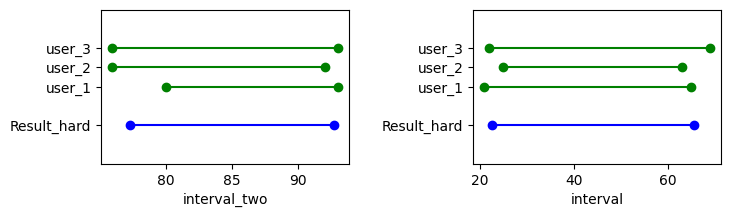

In [12]:
#  Example 0.2
#    Overlap: 3
#    Number of classes: 2
#    Method: HARD
#    Result: GOOD

method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl2')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

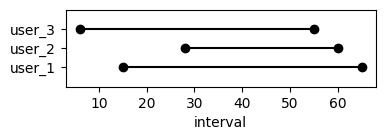

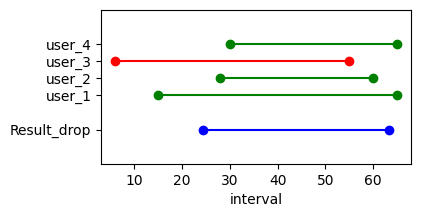

In [13]:
#  Example 1
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: BAD
#
#  We had 3 markups on image, but user_3 added bad interval and the hard-method do not work.
#  We requested additional markup and hard-method worked.

method, group = aggregator.get_group_by_name(results, 'case_001_ov3_cl1_bad_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_001_ov4_cl1_bad_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

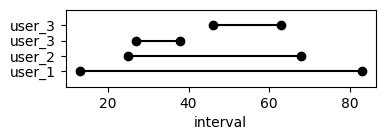

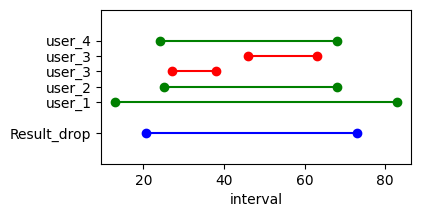

In [14]:
#  Example 2
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: BAD
#
#  We had 3 markups on image, but user_3 added bad intervals and the hard-method do not work.
#  We requested additional markup and hard-method worked.

method, group = aggregator.get_group_by_name(results, 'case_002_ov3_cl1_bad_intervals')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_002_ov4_cl1_bad_intervals')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

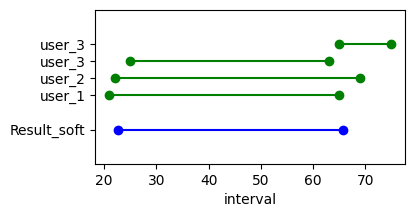

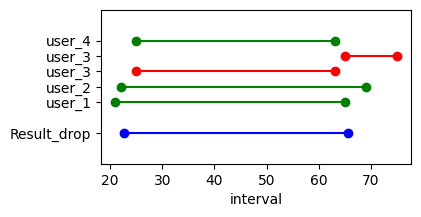

In [15]:
#  Example 3
#    Overlap: 3
#    Number of classes: 1
#    Method: SOFT
#    Result: GOOD
#
#  We had 3 markups on image, but user_3 added extra interval and the hard-method do not work, but soft-method worked.
#  We requested additional markup and hard-method worked after dropping one error markup.

method, group = aggregator.get_group_by_name(results, 'case_003_ov3_cl1_add_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_003_ov4_cl1_add_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

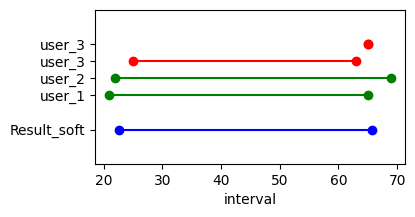

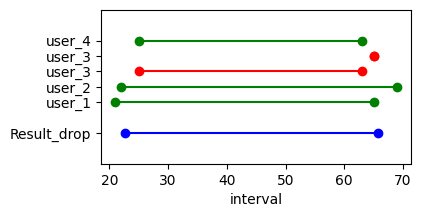

In [16]:
#  Example 4
#    Overlap: 3
#    Number of classes: 1
#    Method: SOFT
#    Result: GOOD
#
#  We had 3 markups on image, but user_3 added extra small interval and the hard-method do not work, but soft-method worked.
#  We requested additional markup and hard-method worked after dropping one error markup.

method, group = aggregator.get_group_by_name(results, 'case_004_ov3_cl1_add_small_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_004_ov4_cl1_add_small_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

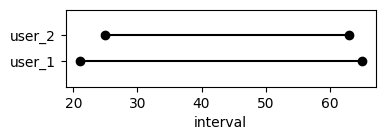

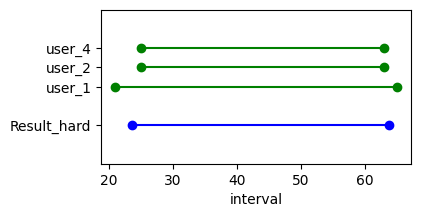

In [17]:
#  Example 5
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: BAD
#
#  We had 3 markups on image, but user_3 added empty markup and the hard-method do not work.
#  We requested additional markup and hard-method worked.

method, group = aggregator.get_group_by_name(results, 'case_005_ov3_cl1_rm_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_005_ov4_cl1_rm_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

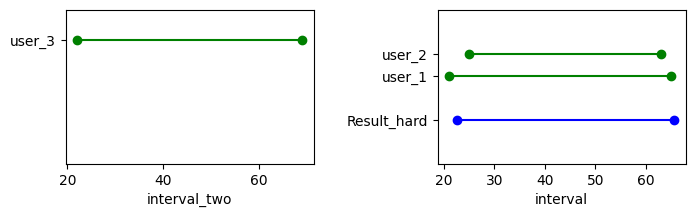

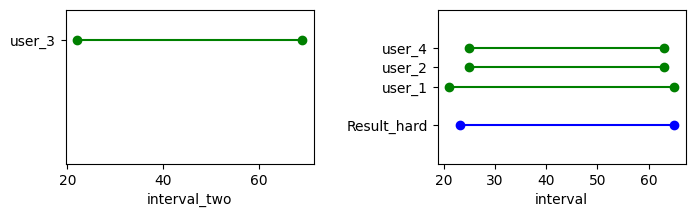

In [18]:
#  Example 6
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: GOOD
#
#  We had 3 markups on image, but user_3 added other interval and the hard-method worked.
#  We requested additional markup and hard-method worked again.

method, group = aggregator.get_group_by_name(results, 'case_006_ov3_cl1_other_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_006_ov4_cl1_other_interval')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)